# Exploratory Data Analysis (EDA)

## Set Up
### Step 1: Import the Libraries

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

### Step 2: Load the Dataset

In [136]:
df_train = pd.read_csv("../data/training.csv", sep='\t')
df_val = pd.read_csv("../data/validation.csv", sep='\t')

print("Train shape:", df_train.shape)
print("Validation shape:", df_val.shape)

Train shape: (29731, 14)
Validation shape: (1878, 13)


## Data Preview
### Step 3: Display the First Few Rows

In [125]:
df_train.head()

,DepartureDate,DepartureYear,DepartureMonth,DepartureDay,FlightNumber,DepartureAirport,ArrivalAirport,Route,ActualFlightTime,ActualTotalFuel,ActualTOW,FLownPassengers,BagsCount,FlightBagsWeight
0,01/10/2016,2016,10,1,1145,MAN,SXF,MAN-SXF,91,3660,64016,175,61,440
1,01/10/2016,2016,10,1,1160,CTA,FCO,CTA-FCO,68,3280,66138,182,27,350
2,01/10/2016,2016,10,1,1183,LGW,SNN,LGW-SNN,64,2720,58447,127,(null),(null)
3,01/10/2016,2016,10,1,1220,ATH,CHQ,ATH-CHQ,35,1682,60587,163,12,150
4,01/10/2016,2016,10,1,1225,CHQ,ATH,CHQ-ATH,34,1877,63090,178,37,490


### Step 4: Data Types and Missing Values
#### Training Set

In [126]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29731 entries, 0 to 29730
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   DepartureDate     29731 non-null  object
 1   DepartureYear     29731 non-null  int64 
 2   DepartureMonth    29731 non-null  int64 
 3   DepartureDay      29731 non-null  int64 
 4   FlightNumber      29731 non-null  int64 
 5   DepartureAirport  29731 non-null  object
 6   ArrivalAirport    29731 non-null  object
 7   Route             29731 non-null  object
 8   ActualFlightTime  29731 non-null  int64 
 9   ActualTotalFuel   29731 non-null  int64 
 10  ActualTOW         29731 non-null  object
 11  FLownPassengers   29731 non-null  object
 12  BagsCount         29731 non-null  object
 13  FlightBagsWeight  29731 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.2+ MB


As we can see, the missing values are not properly identified. We have to replace the `(null)` strings with `np.nan` to handle them correctly. 

In [127]:
df_train.replace("(null)", np.nan, inplace=True)
missing_percentage = (df_train.isnull().sum()/len(df_train))* 100
print("Missing values percentage in training set:")
print(missing_percentage)

Missing values percentage in training set:
DepartureDate       0.000000
DepartureYear       0.000000
DepartureMonth      0.000000
DepartureDay        0.000000
FlightNumber        0.000000
DepartureAirport    0.000000
ArrivalAirport      0.000000
Route               0.000000
ActualFlightTime    0.000000
ActualTotalFuel     0.000000
ActualTOW           1.456392
FLownPassengers     0.319532
BagsCount           7.682217
FlightBagsWeight    8.334735
dtype: float64


#### Validation Set


In [128]:
df_val.replace("(null)", np.nan, inplace=True)
missing_percentage_val = (df_val.isnull().sum()/len(df_val))* 100
print("Missing values percentage in validation set:")
print(missing_percentage_val)

Missing values percentage in validation set:
DepartureDate       0.000000
DepartureYear       0.000000
DepartureMonth      0.000000
DepartureDay        0.000000
FlightNumber        0.000000
DepartureAirport    0.000000
ArrivalAirport      0.000000
Route               0.000000
ActualFlightTime    0.000000
ActualTotalFuel     0.000000
FLownPassengers     0.479233
BagsCount           8.945687
FlightBagsWeight    9.637913
dtype: float64


Let's analyze the missing values in both datasets to understand the extent of the issue.

### Missing Values Analysis

#### ActualTOW

In [157]:
# Filter rows where FlownPassengers is missing
missing_actual_tow = df_train[df_train['ActualTOW'].isna()]


# Optionally, check the percentage of missing values in these rows
missing_percentage_in_rows = missing_actual_tow.isnull().mean() * 100
print("\nPercentage of missing values in these rows:")
print(missing_percentage_in_rows)


Percentage of missing values in these rows:
DepartureDate         0.000000
DepartureYear         0.000000
DepartureMonth        0.000000
DepartureDay          0.000000
FlightNumber          0.000000
DepartureAirport      0.000000
ArrivalAirport        0.000000
Route                 0.000000
ActualFlightTime      0.000000
ActualTotalFuel       0.000000
ActualTOW           100.000000
FLownPassengers       8.083141
BagsCount            20.092379
FlightBagsWeight     20.554273
dtype: float64


The 'ActualTOW' is missing in 2.7% of the training set, which is a significant portion. However since it's the predicted variable, we cannot impute it. Those rows will be dropped in the data preparation step.

In [129]:
# Filter rows where FlownPassengers is missing
missing_flown_passengers_rows = df_train[df_train['FLownPassengers'].isna()]


# Optionally, check the percentage of missing values in these rows
missing_percentage_in_rows = missing_flown_passengers_rows.isnull().mean() * 100
print("\nPercentage of missing values in these rows:")
print(missing_percentage_in_rows)

# Filter rows where FlownPassengers is missing
missing_flown_passengers_rows = df_val[df_val['FLownPassengers'].isna()]

# Optionally, check the percentage of missing values in these rows
missing_percentage_in_rows = missing_flown_passengers_rows.isnull().mean() * 100
print("\nPercentage of missing values in these rows:")
print(missing_percentage_in_rows)



Percentage of missing values in these rows:
DepartureDate         0.000000
DepartureYear         0.000000
DepartureMonth        0.000000
DepartureDay          0.000000
FlightNumber          0.000000
DepartureAirport      0.000000
ArrivalAirport        0.000000
Route                 0.000000
ActualFlightTime      0.000000
ActualTotalFuel       0.000000
ActualTOW            36.842105
FLownPassengers     100.000000
BagsCount           100.000000
FlightBagsWeight    100.000000
dtype: float64

Percentage of missing values in these rows:
DepartureDate         0.0
DepartureYear         0.0
DepartureMonth        0.0
DepartureDay          0.0
FlightNumber          0.0
DepartureAirport      0.0
ArrivalAirport        0.0
Route                 0.0
ActualFlightTime      0.0
ActualTotalFuel       0.0
FLownPassengers     100.0
BagsCount           100.0
FlightBagsWeight    100.0
dtype: float64


If the 'FlownPassengers' is missing the 'BagsCount' and 'FlightBagsWeight' are also missing. As all of those columns are key features for the prediction, we will drop the rows with missing values in 'FlownPassengers'.

#### Bags Count

In [130]:
# Filter rows where BagsCount is missing
missing_bags_count_rows = df_train[df_train['BagsCount'].isna()]

# Optionally, check the percentage of missing values in these rows
missing_percentage_in_rows = missing_bags_count_rows.isnull().mean() * 100
print("\nPercentage of missing values in these rows:")
print(missing_percentage_in_rows)

# Filter rows where BagsCount is missing
missing_bags_count_rows = df_val[df_val['BagsCount'].isna()]

# Optionally, check the percentage of missing values in these rows
missing_percentage_in_rows = missing_bags_count_rows.isnull().mean() * 100
print("\nPercentage of missing values in these rows:")
print(missing_percentage_in_rows)


Percentage of missing values in these rows:
DepartureDate         0.000000
DepartureYear         0.000000
DepartureMonth        0.000000
DepartureDay          0.000000
FlightNumber          0.000000
DepartureAirport      0.000000
ArrivalAirport        0.000000
Route                 0.000000
ActualFlightTime      0.000000
ActualTotalFuel       0.000000
ActualTOW             3.809107
FLownPassengers       4.159370
BagsCount           100.000000
FlightBagsWeight     95.140105
dtype: float64

Percentage of missing values in these rows:
DepartureDate         0.000000
DepartureYear         0.000000
DepartureMonth        0.000000
DepartureDay          0.000000
FlightNumber          0.000000
DepartureAirport      0.000000
ArrivalAirport        0.000000
Route                 0.000000
ActualFlightTime      0.000000
ActualTotalFuel       0.000000
FLownPassengers       5.357143
BagsCount           100.000000
FlightBagsWeight     95.238095
dtype: float64


By logic, 'BagsCount' and 'FlownPassengers' should be highly correlated, as the number of bags should generally be proportional to the number of passengers. We will analyze this correlation in the next step.

Correlation between FlownPassengers and BagsCount: 0.3185180644648577


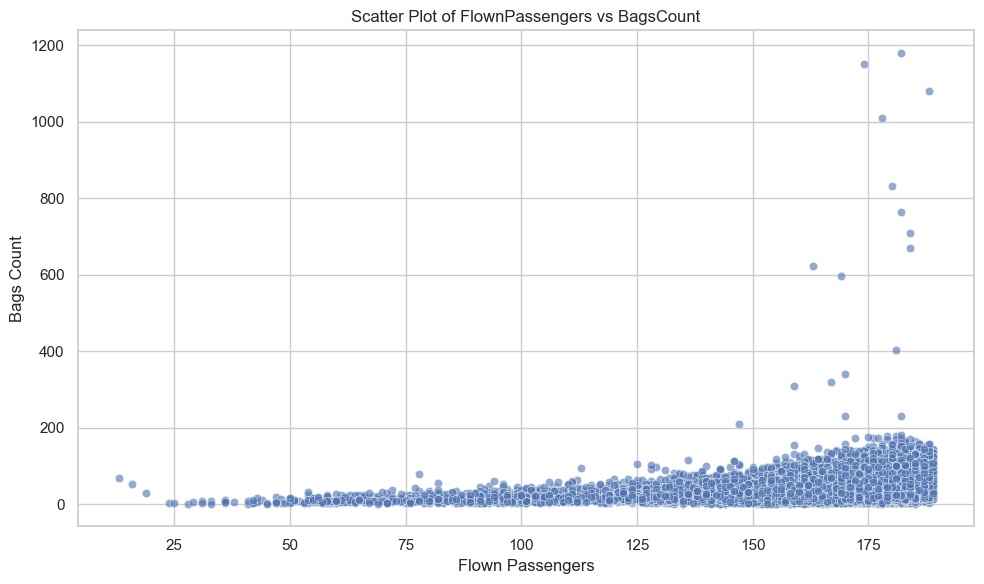

In [131]:
# Ensure both columns are numeric
df_train['FLownPassengers'] = pd.to_numeric(df_train['FLownPassengers'], errors='coerce')
df_train['BagsCount'] = pd.to_numeric(df_train['BagsCount'], errors='coerce')

# Drop rows with missing values in either column
df_cleaned = df_train.dropna(subset=['FLownPassengers', 'BagsCount'])

# Calculate the correlation coefficient
correlation = df_cleaned['FLownPassengers'].corr(df_cleaned['BagsCount'])
print(f"Correlation between FlownPassengers and BagsCount: {correlation}")

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FLownPassengers', y='BagsCount', data=df_cleaned, alpha=0.6)
plt.title("Scatter Plot of FlownPassengers vs BagsCount")
plt.xlabel("Flown Passengers")
plt.ylabel("Bags Count")
plt.tight_layout()
plt.show()

The correlation suffers from outliers. We will come back to it after we handle the outliers in the numeric columns. 

#### FlightBagsWeight

In [132]:
# Filter rows where FlightBagsWeight is missing
missing_flight_bags_weight_rows = df_train[df_train['FlightBagsWeight'].isna()]

# Optionally, check the percentage of missing values in these rows
missing_percentage_in_rows = missing_flight_bags_weight_rows.isnull().mean() * 100
print("\nPercentage of missing values in these rows (Train):")
print(missing_percentage_in_rows)

# Filter rows where FlightBagsWeight is missing in the validation set
missing_flight_bags_weight_rows = df_val[df_val['FlightBagsWeight'].isna()]

# Optionally, check the percentage of missing values in these rows
missing_percentage_in_rows = missing_flight_bags_weight_rows.isnull().mean() * 100
print("\nPercentage of missing values in these rows (Validation):")
print(missing_percentage_in_rows)



Percentage of missing values in these rows (Train):
DepartureDate         0.000000
DepartureYear         0.000000
DepartureMonth        0.000000
DepartureDay          0.000000
FlightNumber          0.000000
DepartureAirport      0.000000
ArrivalAirport        0.000000
Route                 0.000000
ActualFlightTime      0.000000
ActualTotalFuel       0.000000
ActualTOW             3.591606
FLownPassengers       3.833737
BagsCount            87.691687
FlightBagsWeight    100.000000
dtype: float64

Percentage of missing values in these rows (Validation):
DepartureDate         0.000000
DepartureYear         0.000000
DepartureMonth        0.000000
DepartureDay          0.000000
FlightNumber          0.000000
DepartureAirport      0.000000
ArrivalAirport        0.000000
Route                 0.000000
ActualFlightTime      0.000000
ActualTotalFuel       0.000000
FLownPassengers       4.972376
BagsCount            88.397790
FlightBagsWeight    100.000000
dtype: float64


If the 'FlightBagsWeight' is missing, the 'BagsCount' is also missing, so using the BagsCount as a source of information of data to impute is dangerous. Let's check the correlation between 'FlightBagsWeight' and 'BagsCount' to see if we can use 'BagsCount' to impute the missing values in 'FlightBagsWeight'.


Correlation between BagsCount and FlightBagsWeight: 0.8305423928610963


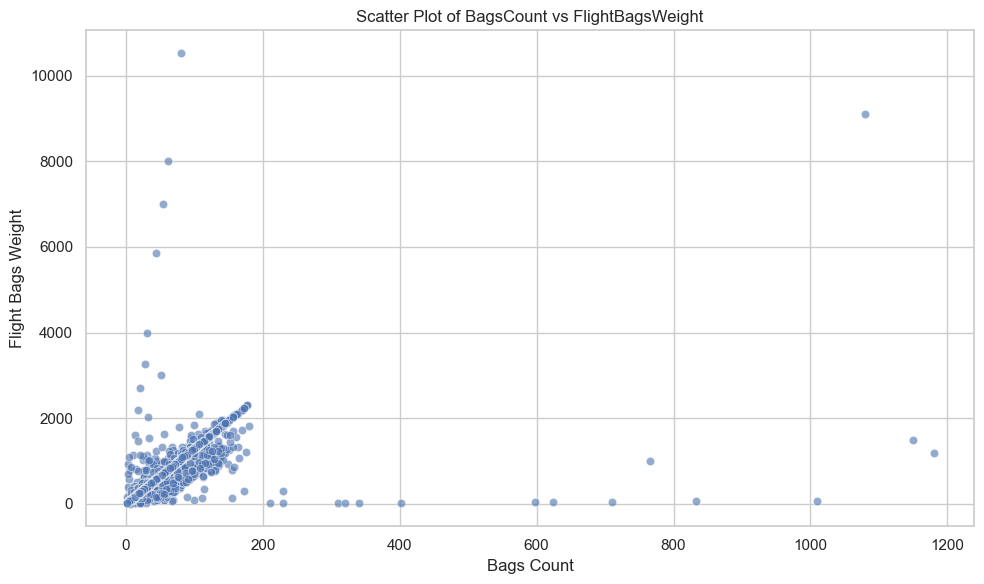

In [137]:
# Ensure both columns are numeric
df_train['BagsCount'] = pd.to_numeric(df_train['BagsCount'], errors='coerce')
df_train['FlightBagsWeight'] = pd.to_numeric(df_train['FlightBagsWeight'], errors='coerce')

# Drop rows with missing values in either column
df_cleaned = df_train.dropna(subset=['BagsCount', 'FlightBagsWeight'])

# Calculate the correlation coefficient
correlation = df_cleaned['BagsCount'].corr(df_cleaned['FlightBagsWeight'])
print(f"Correlation between BagsCount and FlightBagsWeight: {correlation}")

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BagsCount', y='FlightBagsWeight', data=df_cleaned, alpha=0.6)
plt.title("Scatter Plot of BagsCount vs FlightBagsWeight")
plt.xlabel("Bags Count")
plt.ylabel("Flight Bags Weight")
plt.tight_layout()
plt.show()

Both correlation models struggle from extreme outliers. Let's visualize the distributions of the numeric values in both datasets to understand the extent of the outliers and missing values.

## Step 5: Visualize Numeric Values Distributions
#### FlownPassengers

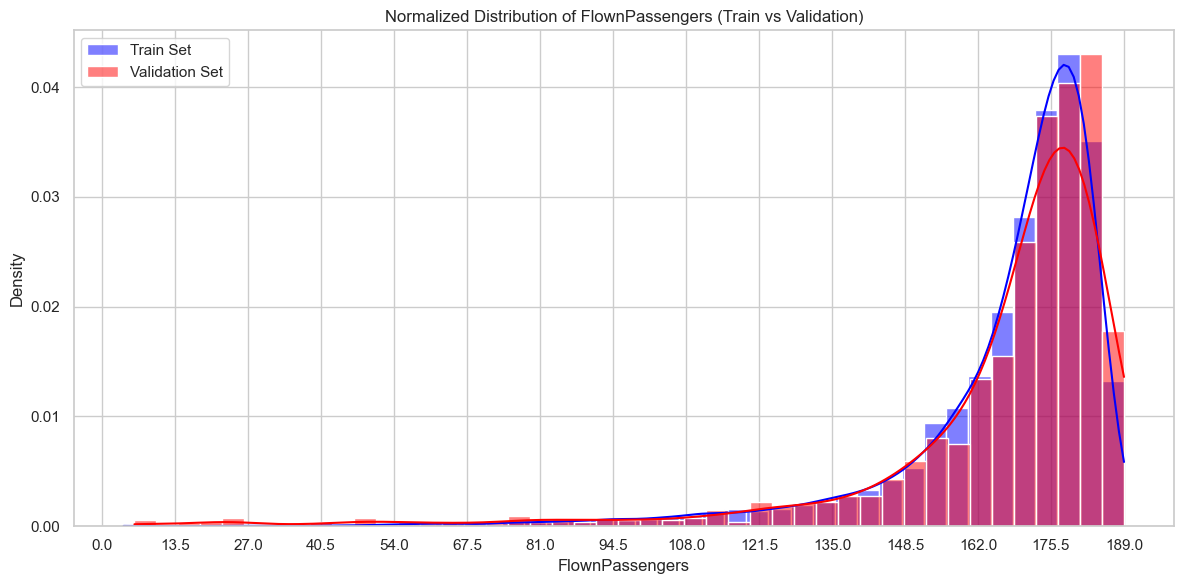

29731 29636 train samples
1878 1869 validation samples


In [138]:
# Ensure the 'FlownPassengers' column is numeric
df_train['FLownPassengers'] = pd.to_numeric(df_train['FLownPassengers'], errors='coerce')
df_val['FLownPassengers'] = pd.to_numeric(df_val['FLownPassengers'], errors='coerce')

# Drop missing values after conversion
flown_passengers_train = df_train['FLownPassengers'].dropna()
flown_passengers_val = df_val['FLownPassengers'].dropna()

# Proceed with your plotting code
plt.figure(figsize=(12, 6))
sns.histplot(flown_passengers_train, kde=True, bins=45, color='blue', label='Train Set', stat='density', alpha=0.5)
sns.histplot(flown_passengers_val, kde=True, bins=45, color='red', label='Validation Set', stat='density', alpha=0.5)

plt.title("Normalized Distribution of FlownPassengers (Train vs Validation)")
plt.xlabel("FlownPassengers")
plt.ylabel("Density")
plt.legend()

# Reduce number of x-ticks
max_val = max(flown_passengers_train.max(), flown_passengers_val.max())
plt.xticks(np.linspace(0, max_val, num=15))  # Use 15 evenly spaced ticks

plt.tight_layout()
plt.show()

print(len(df_train), len(flown_passengers_train), "train samples")
print(len(df_val), len(flown_passengers_val), "validation samples")


There aren't any unexpected significant outliers in the 'FlownPassengers' column and in the previous step we decided that we won't be keeping rows with missing data for FlownPassengers, so we can proceed with the analysis without further modifications.

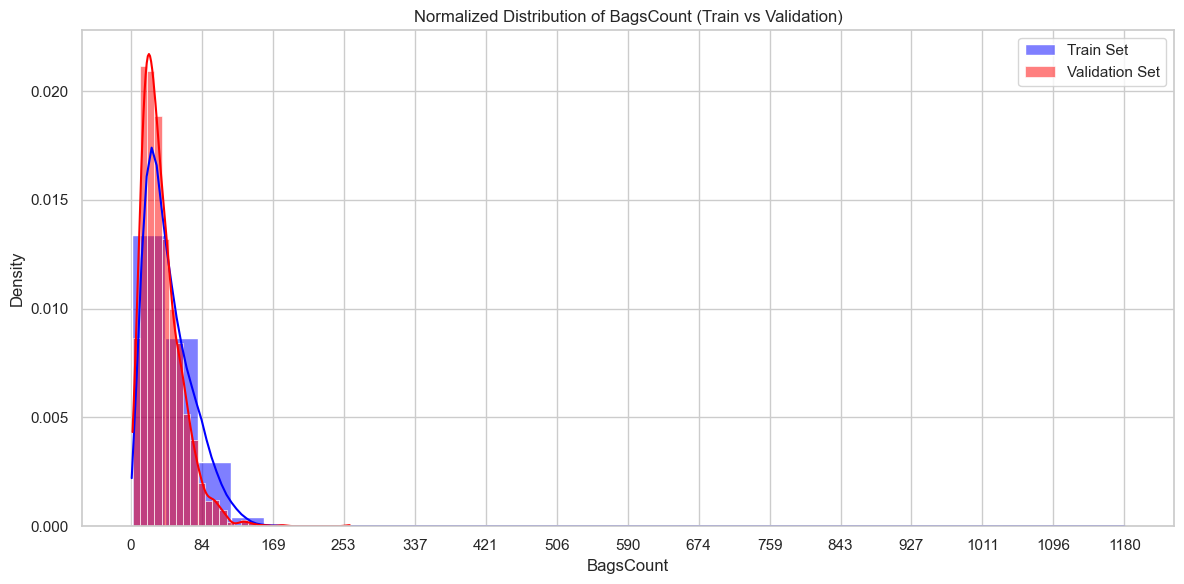

29731 27447 train samples
1878 1710 validation samples
1180.0 max bags count in train set
260.0 max bags count in validation set


In [139]:
# Ensure the 'BagsCount' column is numeric
df_train['BagsCount'] = pd.to_numeric(df_train['BagsCount'], errors='coerce')
df_val['BagsCount'] = pd.to_numeric(df_val['BagsCount'], errors='coerce')

# Drop missing values after conversion
bags_count_train = df_train['BagsCount'].dropna()
bags_count_val = df_val['BagsCount'].dropna()

# Plot the distributions
plt.figure(figsize=(12, 6))
sns.histplot(bags_count_train, kde=True, bins=30, color='blue', label='Train Set', stat='density', alpha=0.5)
sns.histplot(bags_count_val, kde=True, bins=30, color='red', label='Validation Set', stat='density', alpha=0.5)

plt.title("Normalized Distribution of BagsCount (Train vs Validation)")
plt.xlabel("BagsCount")
plt.ylabel("Density")
plt.legend()

# Reduce number of x-ticks
max_val = max(bags_count_train.max(), bags_count_val.max())
plt.xticks(np.linspace(0, max_val, num=15))  # Use 10 evenly spaced ticks

plt.tight_layout()
plt.show()

print(len(df_train), len(bags_count_train), "train samples")
print(len(df_val), len(bags_count_val), "validation samples")

print(max(bags_count_train), "max bags count in train set")
print(max(bags_count_val), "max bags count in validation set")

There is clearly an issue with outliers in the source data, as one of the train set flights has a BagsCount of 1080, which is not realistic. We will handle these outliers by capping the values under the 99th percentile.

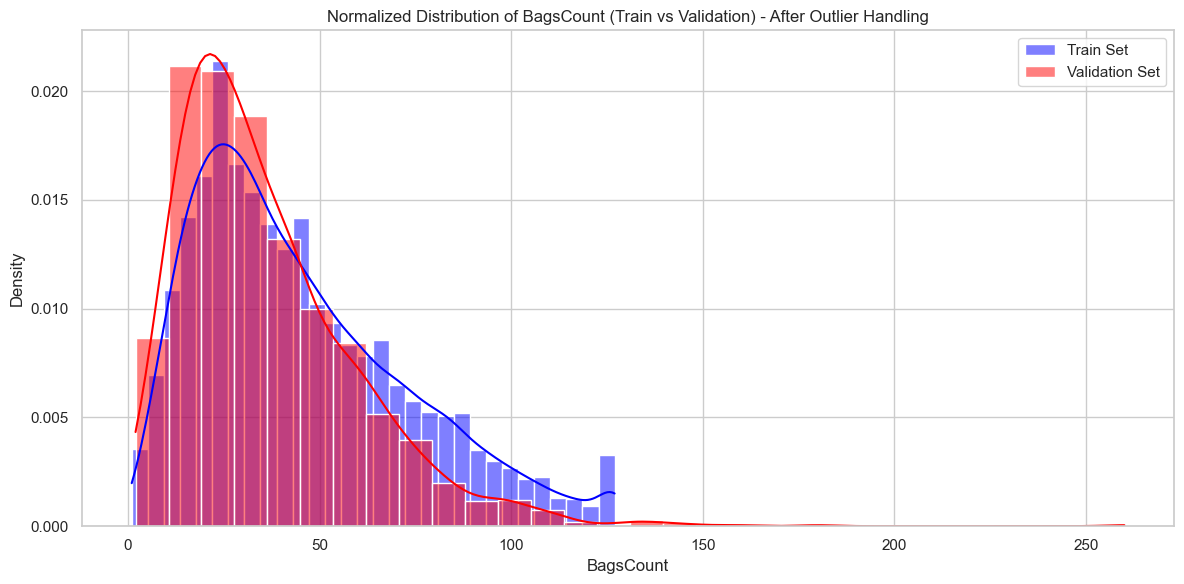

99th Percentile: 127.0
29731 27447 train samples after outlier handling
1878 1710 validation samples


In [140]:
# Calculate the 99th percentile
percentile_99 = bags_count_train.quantile(0.99)

# Cap values above the 99th percentile
df_train['BagsCount'] = np.where(df_train['BagsCount'] > percentile_99, percentile_99, df_train['BagsCount'])

# Recalculate the cleaned BagsCount column
bags_count_train = df_train['BagsCount'].dropna()

# Re-plot the distribution after handling outliers
plt.figure(figsize=(12, 6))
sns.histplot(bags_count_train, kde=True, bins=30, color='blue', label='Train Set', stat='density', alpha=0.5)
sns.histplot(bags_count_val, kde=True, bins=30, color='red', label='Validation Set', stat='density', alpha=0.5)

plt.title("Normalized Distribution of BagsCount (Train vs Validation) - After Outlier Handling")
plt.xlabel("BagsCount")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

print(f"99th Percentile: {percentile_99}")
print(len(df_train), len(bags_count_train), "train samples after outlier handling")
print(len(df_val), len(bags_count_val), "validation samples")

With the outliers capped, the distribution of 'BagsCount' looks more reasonable. We will use this capped version for further analysis and imputation of missing values.


#### FlightBagsWeight


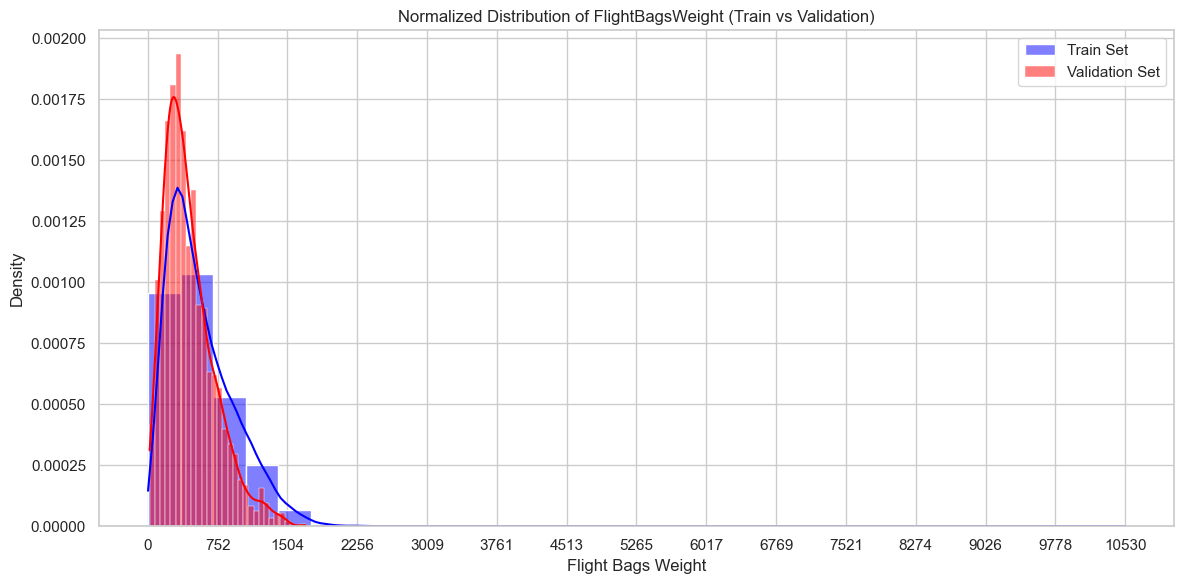

29731 27253 train samples
1878 1697 validation samples
10530.0 max flight bags weight in train set
1700.0 max flight bags weight in validation set


In [141]:
# Ensure the 'FlightBagsWeight' column is numeric
df_train['FlightBagsWeight'] = pd.to_numeric(df_train['FlightBagsWeight'], errors='coerce')
df_val['FlightBagsWeight'] = pd.to_numeric(df_val['FlightBagsWeight'], errors='coerce')

# Drop missing values after conversion
flight_bags_weight_train = df_train['FlightBagsWeight'].dropna()
flight_bags_weight_val = df_val['FlightBagsWeight'].dropna()

# Plot the distributions
plt.figure(figsize=(12, 6))
sns.histplot(flight_bags_weight_train, kde=True, bins=30, color='blue', label='Train Set', stat='density', alpha=0.5)
sns.histplot(flight_bags_weight_val, kde=True, bins=30, color='red', label='Validation Set', stat='density', alpha=0.5)

plt.title("Normalized Distribution of FlightBagsWeight (Train vs Validation)")
plt.xlabel("Flight Bags Weight")
plt.ylabel("Density")
plt.legend()

# Reduce number of x-ticks
max_val = max(flight_bags_weight_train.max(), flight_bags_weight_val.max())
plt.xticks(np.linspace(0, max_val, num=15))  # Use 15 evenly spaced ticks

plt.tight_layout()
plt.show()

print(len(df_train), len(flight_bags_weight_train), "train samples")
print(len(df_val), len(flight_bags_weight_val), "validation samples")

print(max(flight_bags_weight_train), "max flight bags weight in train set")
print(max(flight_bags_weight_val), "max flight bags weight in validation set")

There are extreme outliers in the 'FlightBagsWeight' column, which are not realistic. We will handle these outliers by capping the values above the 95th percentile, similar to how we handled the 'BagsCount' column.


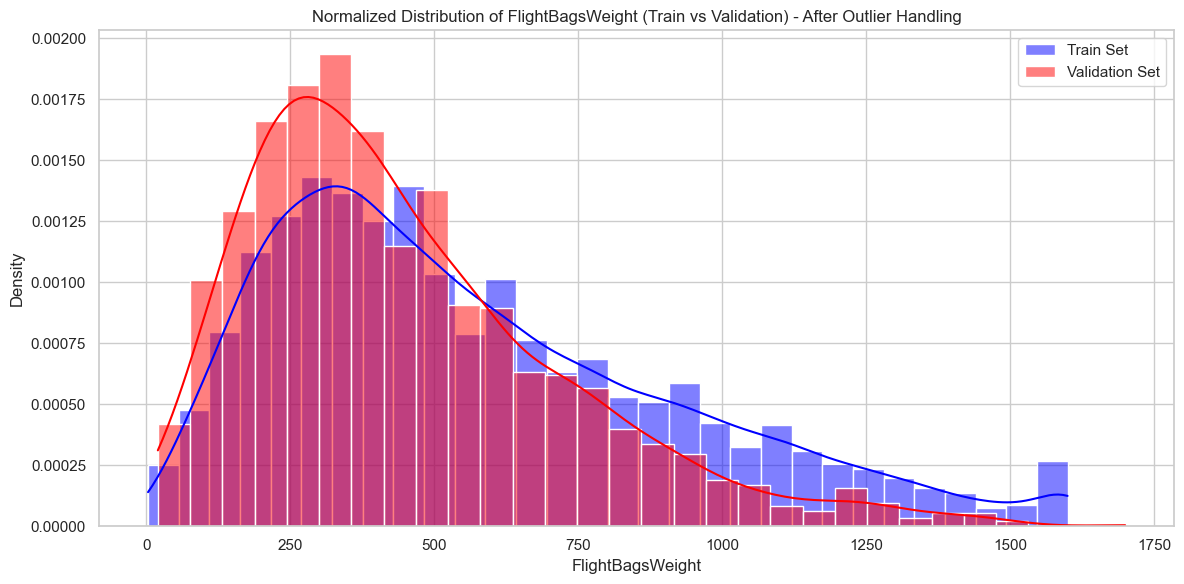

99th Percentile: 1600.0
29731 27253 train samples after outlier handling
1878 1697 validation samples


In [142]:
# Calculate the 99th percentile
percentile_99 = flight_bags_weight_train.quantile(0.99)  # Correctly calculate the 99th percentile

# Cap values above the 99th percentile
df_train['FlightBagsWeight'] = np.where(df_train['FlightBagsWeight'] > percentile_99, percentile_99, df_train['FlightBagsWeight'])

# Recalculate the cleaned FlightBagsWeight column
flight_bags_weight_train = df_train['FlightBagsWeight'].dropna()

# Re-plot the distribution after handling outliers
plt.figure(figsize=(12, 6))
sns.histplot(flight_bags_weight_train, kde=True, bins=30, color='blue', label='Train Set', stat='density', alpha=0.5)
sns.histplot(flight_bags_weight_val, kde=True, bins=30, color='red', label='Validation Set', stat='density', alpha=0.5)

plt.title("Normalized Distribution of FlightBagsWeight (Train vs Validation) - After Outlier Handling")
plt.xlabel("FlightBagsWeight")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

print(f"99th Percentile: {percentile_99}")
print(len(df_train), len(flight_bags_weight_train), "train samples after outlier handling")
print(len(df_val), len(flight_bags_weight_val), "validation samples")

With the outliers capped, the distribution of 'FlightBagsWeight' looks much better. Let's come back to checking the correlation.



Correlation between FlownPassengers and BagsCount: 0.36479707222766733


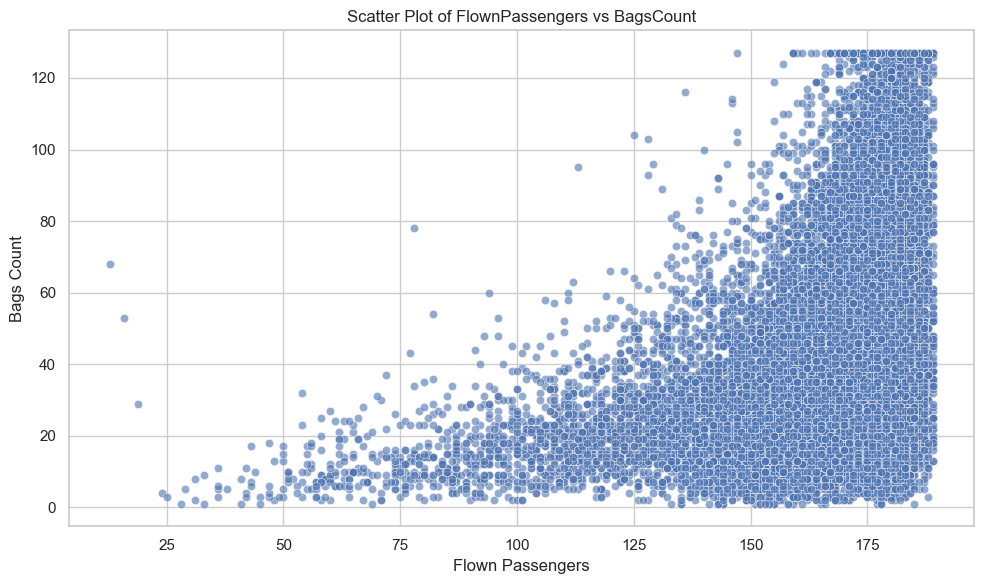

In [148]:
# Ensure both columns are numeric
df_train['FLownPassengers'] = pd.to_numeric(df_train['FLownPassengers'], errors='coerce')
df_train['BagsCount'] = pd.to_numeric(df_train['BagsCount'], errors='coerce')

# Drop rows with missing values in either column
df_cleaned = df_train.dropna(subset=['FLownPassengers', 'BagsCount'])

# Calculate the correlation coefficient
correlation = df_cleaned['FLownPassengers'].corr(df_cleaned['BagsCount'])
print(f"Correlation between FlownPassengers and BagsCount: {correlation}")

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FLownPassengers', y='BagsCount', data=df_cleaned, alpha=0.6)
plt.title("Scatter Plot of FlownPassengers vs BagsCount")
plt.xlabel("Flown Passengers")
plt.ylabel("Bags Count")
plt.tight_layout()
plt.show()

Even after the outlier handling, the correlation between 'FlownPassengers' and 'BagsCount' is still not strong enough to justify the imputation of 'BagsCount' based on 'FlownPassengers'. Therefore in the data preparation step we will use the median of 'BagsCount' to impute the missing values in 'BagsCount'. 


Correlation between BagsCount and FlightBagsWeight: 0.9689016061136354


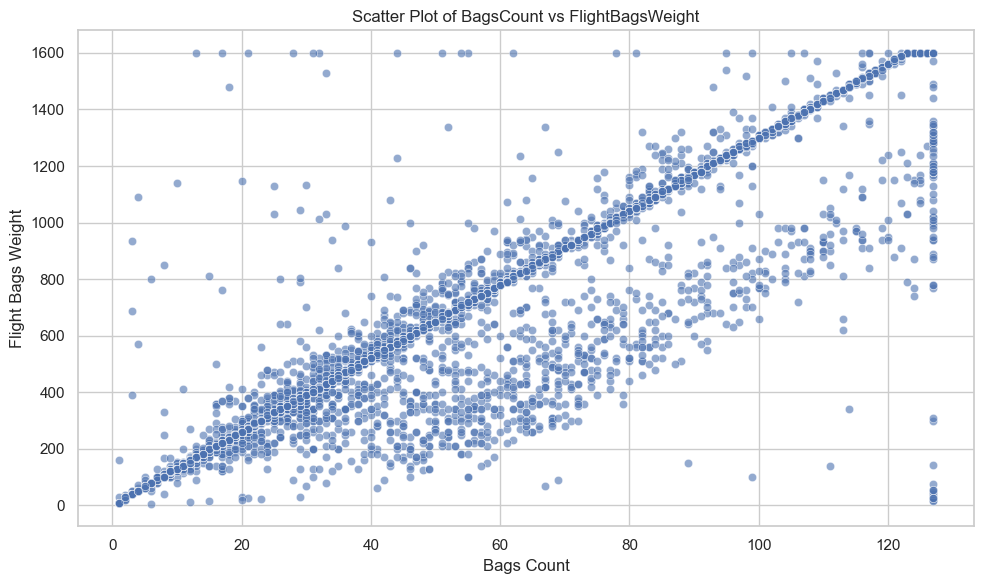

In [149]:
# Ensure both columns are numeric
df_train['BagsCount'] = pd.to_numeric(df_train['BagsCount'], errors='coerce')
df_train['FlightBagsWeight'] = pd.to_numeric(df_train['FlightBagsWeight'], errors='coerce')

# Drop rows with missing values in either column
df_cleaned = df_train.dropna(subset=['BagsCount', 'FlightBagsWeight'])

# Calculate the correlation coefficient
correlation = df_cleaned['BagsCount'].corr(df_cleaned['FlightBagsWeight'])
print(f"Correlation between BagsCount and FlightBagsWeight: {correlation}")

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BagsCount', y='FlightBagsWeight', data=df_cleaned, alpha=0.6)
plt.title("Scatter Plot of BagsCount vs FlightBagsWeight")
plt.xlabel("Bags Count")
plt.ylabel("Flight Bags Weight")
plt.tight_layout()
plt.show()

There is clear correlation between 'BagsCount' and 'FlightBagsWeight', so we can use 'BagsCount' to impute the missing values in 'FlightBagsWeight'. We will use the statistic of average weight per bag to impute the missing values in 'FlightBagsWeight'.

#### ActualTotalFuel



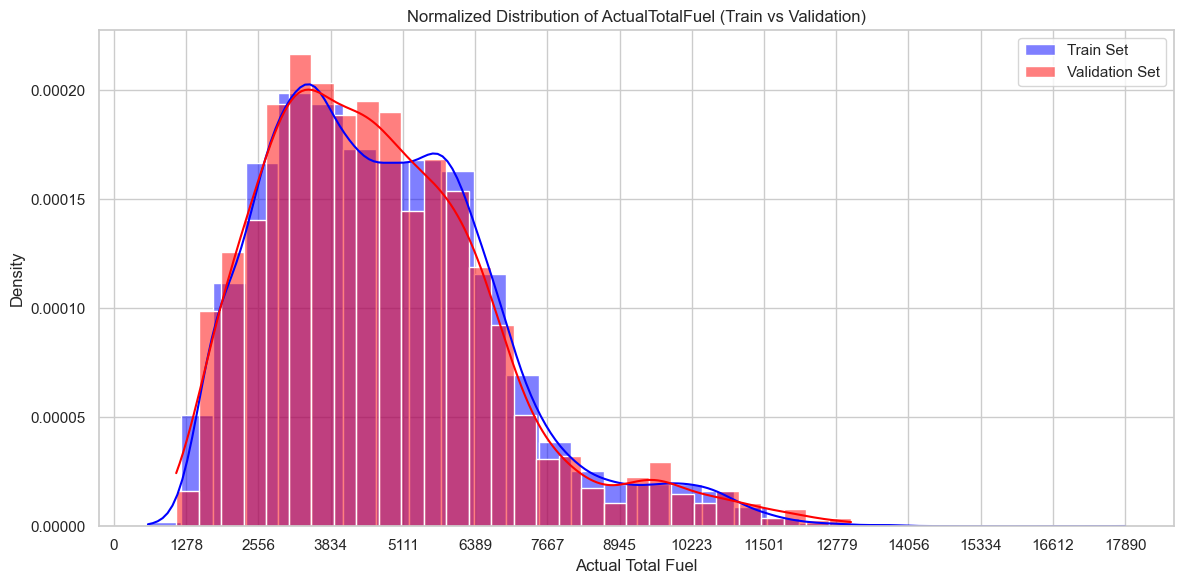

29731 29731 train samples
1878 1878 validation samples


In [150]:
# Ensure the 'ActualTotalFuel' column is numeric
df_train['ActualTotalFuel'] = pd.to_numeric(df_train['ActualTotalFuel'], errors='coerce')
df_val['ActualTotalFuel'] = pd.to_numeric(df_val['ActualTotalFuel'], errors='coerce')

# Drop missing values after conversion
actual_total_fuel_train = df_train['ActualTotalFuel'].dropna()
actual_total_fuel_val = df_val['ActualTotalFuel'].dropna()

# Plot the distributions
plt.figure(figsize=(12, 6))
sns.histplot(actual_total_fuel_train, kde=True, bins=30, color='blue', label='Train Set', stat='density', alpha=0.5)
sns.histplot(actual_total_fuel_val, kde=True, bins=30, color='red', label='Validation Set', stat='density', alpha=0.5)

plt.title("Normalized Distribution of ActualTotalFuel (Train vs Validation)")
plt.xlabel("Actual Total Fuel")
plt.ylabel("Density")
plt.legend()

# Reduce number of x-ticks
max_val = max(actual_total_fuel_train.max(), actual_total_fuel_val.max())
plt.xticks(np.linspace(0, max_val, num=15))  # Use 15 evenly spaced ticks

plt.tight_layout()
plt.show()

print(len(df_train), len(actual_total_fuel_train), "train samples")
print(len(df_val), len(actual_total_fuel_val), "validation samples")

#### ActualTOW

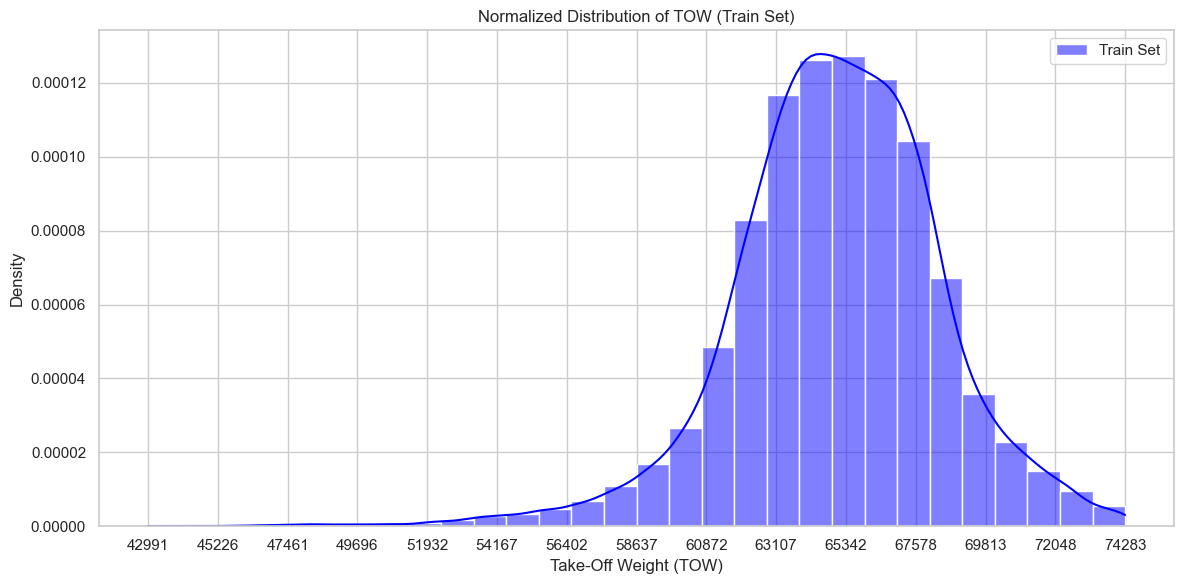

29731 29298 train samples


In [154]:
# Ensure the 'TOW' column is numeric
df_train['ActualTOW'] = pd.to_numeric(df_train['ActualTOW'], errors='coerce')

# Drop missing values after conversion
tow_train = df_train['ActualTOW'].dropna()

# Plot the distribution of TOW
plt.figure(figsize=(12, 6))
sns.histplot(tow_train, kde=True, bins=30, color='blue', label='Train Set', stat='density', alpha=0.5)

plt.title("Normalized Distribution of TOW (Train Set)")
plt.xlabel("Take-Off Weight (TOW)")
plt.ylabel("Density")
plt.legend()

# Reduce number of x-ticks
max_val = tow_train.max()
min_val = tow_train.min()
plt.xticks(np.linspace(min_val, max_val, num=15))  # Use 15 evenly spaced ticks

plt.tight_layout()
plt.show()

print(len(df_train), len(tow_train), "train samples")